In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
data = [d for d in os.listdir()]
data

['0.075000_241857_3.csv',
 '0.012500_1884545_3.csv',
 '0.050000_31841_3.csv',
 '0.037500_1884545_9.csv',
 '0.075000_241857_0.csv',
 '0.100000_4401_8.csv',
 '0.000000_31841_3.csv',
 '0.100000_31841_9.csv',
 '0.200000_4401_1.csv',
 '0.025000_241857_8.csv',
 '0.050000_31841_1.csv',
 '0.025000_241857_4.csv',
 '0.025000_1884545_3.csv',
 '0.075000_241857_9.csv',
 '0.200000_4401_5.csv',
 '0.050000_31841_5.csv',
 '0.000000_31841_7.csv',
 '0.025000_241857_1.csv',
 '0.200000_4401_3.csv',
 '0.100000_4401_4.csv',
 '0.200000_4401_6.csv',
 '0.025000_1884545_7.csv',
 '0.000000_31841_6.csv',
 '0.000000_241857_6.csv',
 '0.000000_4401_1.csv',
 '0.100000_31841_1.csv',
 '0.200000_4401_0.csv',
 '0.025000_1884545_2.csv',
 '0.300000_4401_6.csv',
 '0.100000_31841_0.csv',
 '0.037500_1884545_5.csv',
 '0.000000_4401_4.csv',
 '0.300000_4401_1.csv',
 '0.100000_31841_7.csv',
 '0.012500_1884545_0.csv',
 '0.037500_1884545_7.csv',
 '0.050000_241857_4.csv',
 '0.025000_241857_3.csv',
 '0.000000_241857_3.csv',
 '0.012500

In [8]:
split_names = [d.split('_')[:2] for d in data if not '.ipynb' in d] 

perts = list(set([s[0] for s in split_names]))
dofs  = list(set([s[1] for s in split_names]))

perts.sort(key=float)
dofs.sort(key=int, reverse=True)

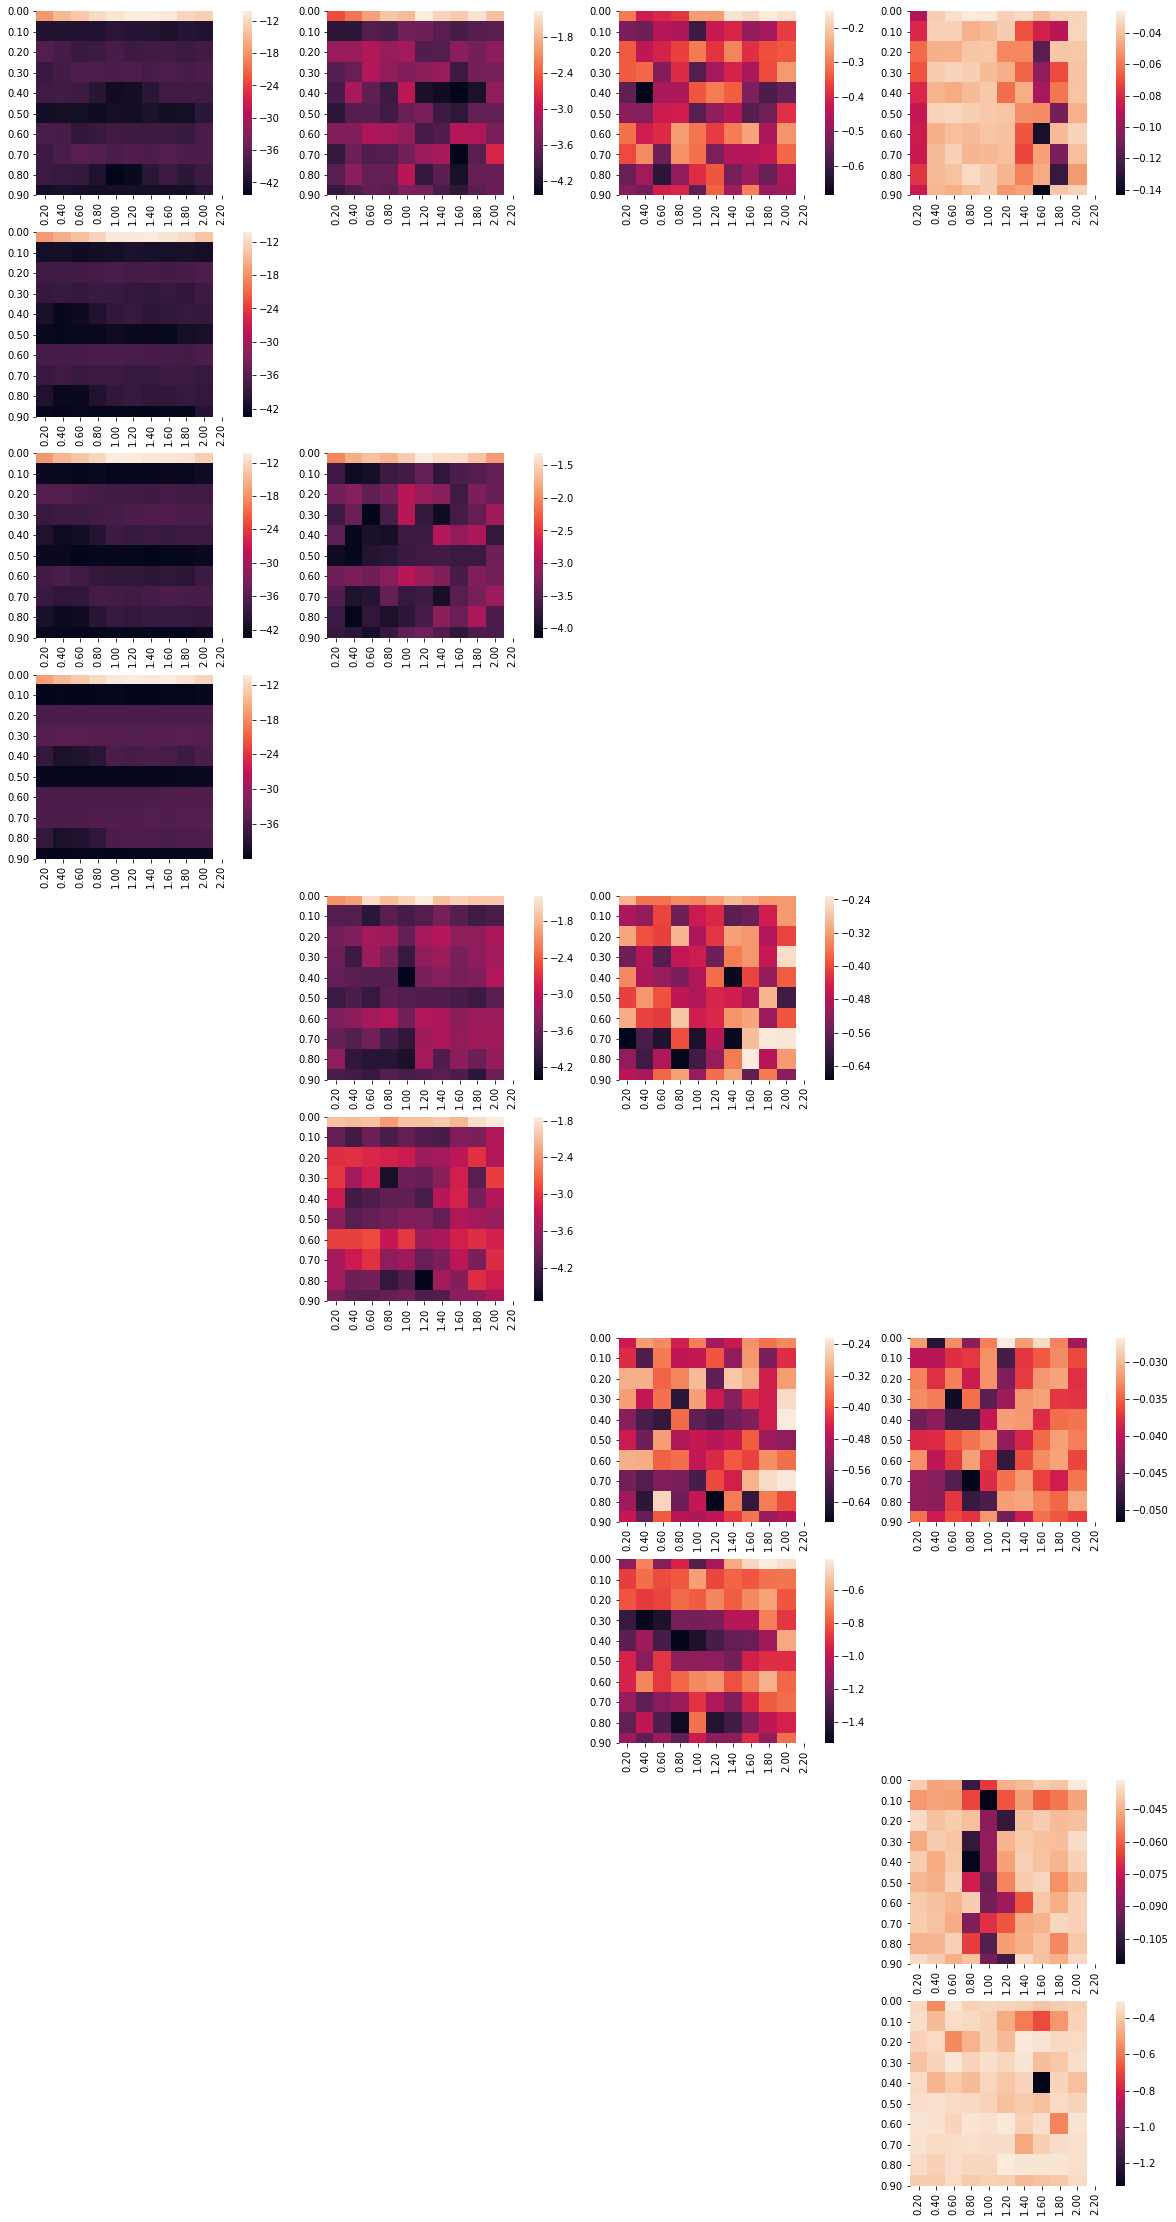

In [12]:
fig = plt.figure(figsize=(20,40))
plt.title('Aggregation Damping and Drop Tolerance vs Time to Solve')

for i, p in enumerate(perts):
    for j, d in enumerate(dofs):
        
        fstart = p + '_' + d
        fs = [f for f in data if f.startswith(fstart)]
        
        if len(fs) == 0:
            continue
            
        ax = plt.subplot(len(perts), len(dofs), i * len(dofs) + j + 1)
        
        fs.sort()
            
        df = pd.concat((pd.read_csv(f, header=None) for f in fs))
        df.index = [format(x, '1.2f') for x in np.linspace(0.0, 0.9, 10)]
        df.columns = [format(x, '1.2f') for x in np.linspace(0.2, 2.2, 11)]
        
        #ax.title.set_text(f'Perturbation = {p}, DOFs = {d}')
        for tick in ax.get_yticklabels():
            tick.set_rotation(90)
        
        sns.heatmap(df)
        
plt.show()